In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [92]:
df=pd.read_csv("contractor colony.csv")
df.head()

,date,population
0,07-01-2022,3
1,13-03-2022,7
2,28-05-2022,5
3,10-06-2022,6
4,16-07-2022,7


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9 non-null      object
 1   population  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [94]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [95]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-95-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [84]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
from prophet import Prophet

In [97]:
population=df.groupby('date')['population'].sum().reset_index()

In [98]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [99]:
model=Prophet(interval_width=0.95)

In [100]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/rw5ux4nn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/5au7cp55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37187', 'data', 'file=/tmp/tmpqki2d_87/rw5ux4nn.json', 'init=/tmp/tmpqki2d_87/5au7cp55.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model7od80t2z/prophet_model-20230421061740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:17:40 - cmdstanpy - INFO - Chain [1] start processing
INF

In [101]:
future_dates=model.make_future_dataframe(periods=30)

In [102]:
forecast=model.predict(future_dates)

           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-03-13  6.290748    3.284044    9.346778     6.290748     6.290748   
1  2022-05-28  6.059383    2.633411    9.349085     6.059383     6.059383   
2  2022-07-01  5.955877    2.540055    9.320625     5.955877     5.955877   
3  2022-07-16  5.910213    2.502974    9.167424     5.910213     5.910213   
4  2022-09-21  5.706246    2.480518    8.869324     5.706246     5.706246   
5  2022-10-06  5.660582    2.665539    8.825657     5.660582     5.660582   
6  2022-10-13  5.639272    2.342320    8.861035     5.639272     5.639272   
7  2022-12-24  5.420084    2.460272    8.786634     5.420084     5.420084   
8  2023-01-15  5.353110    2.122414    8.478426     5.353110     5.353110   
9  2023-01-16  5.350066    2.123199    8.680302     5.350066     5.350066   
10 2023-01-17  5.347021    2.246621    8.613079     5.347021     5.347021   
11 2023-01-18  5.343977    1.952358    8.728689     5.343977     5.343977   

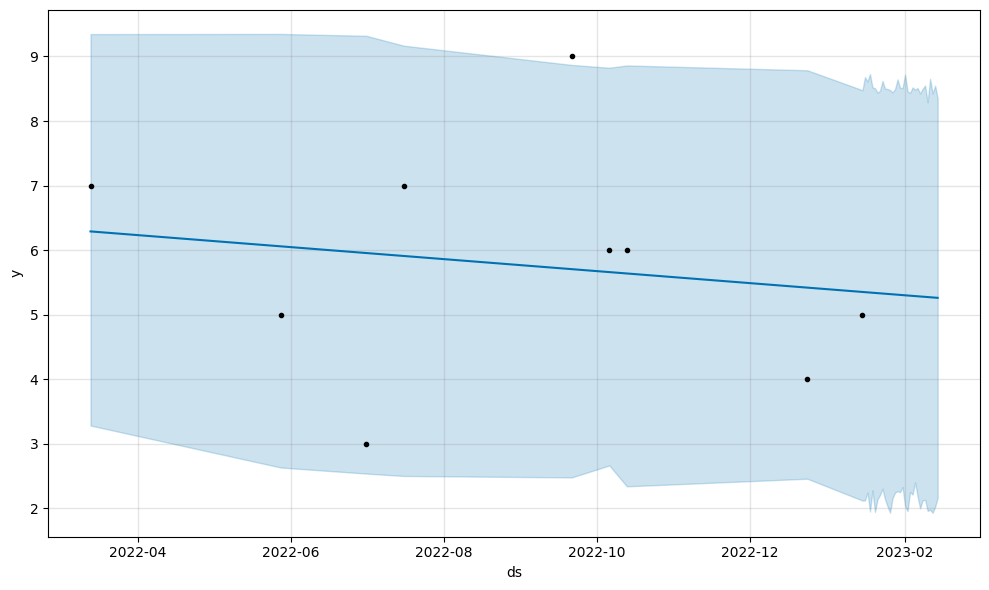

In [103]:
model.plot(forecast)
print(forecast)

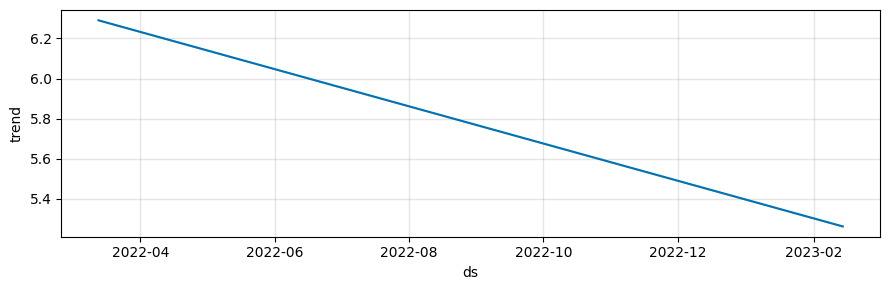

In [104]:
component=model.plot_components(forecast)

In [105]:
 model1=Prophet(interval_width=0.95)

In [106]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/2k5617i_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/tc8e3rfq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15201', 'data', 'file=/tmp/tmpqki2d_87/2k5617i_.json', 'init=/tmp/tmpqki2d_87/tc8e3rfq.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_model64bojokg/prophet_model-20230421061755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:17:55 - cmdstanpy - INFO - Chain [1] start processing
INF

In [107]:
future_dates=model1.make_future_dataframe(periods=10)

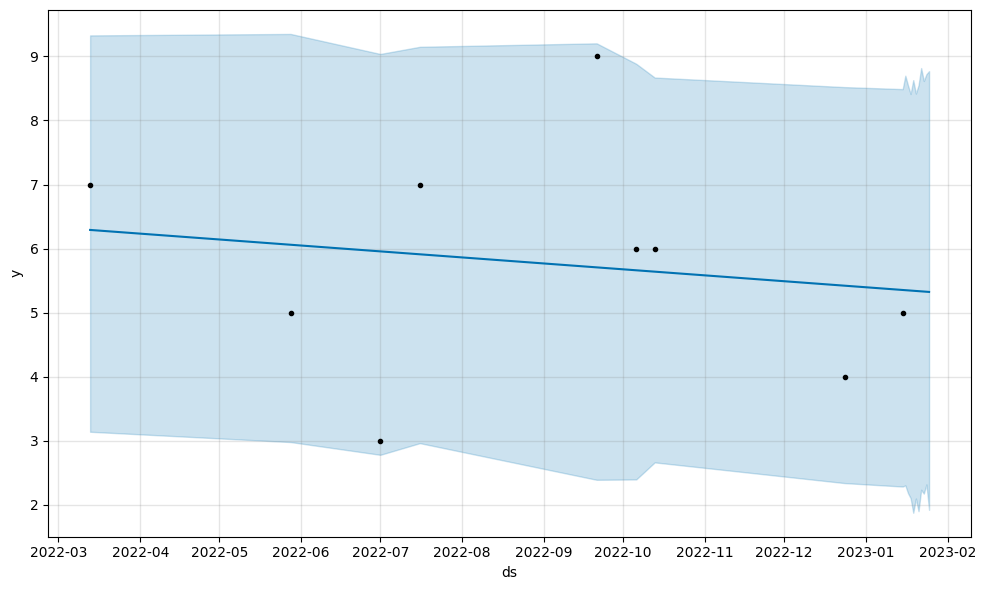

In [108]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-03-13  6.290748    3.139233    9.328239     6.290748     6.290748   
1  2022-05-28  6.059383    2.978595    9.351082     6.059383     6.059383   
2  2022-07-01  5.955877    2.779097    9.038453     5.955877     5.955877   
3  2022-07-16  5.910213    2.961393    9.150325     5.910213     5.910213   
4  2022-09-21  5.706246    2.389041    9.204356     5.706246     5.706246   
5  2022-10-06  5.660582    2.394582    8.885150     5.660582     5.660582   
6  2022-10-13  5.639272    2.660935    8.670289     5.639272     5.639272   
7  2022-12-24  5.420084    2.337646    8.520912     5.420084     5.420084   
8  2023-01-15  5.353110    2.283767    8.489688     5.353110     5.353110   
9  2023-01-16  5.350066    2.301509    8.699284     5.350066     5.350066   
10 2023-01-17  5.347021    2.181385    8.549122     5.347021     5.347021   
11 2023-01-18  5.343977    2.101593    8.413606     5.343977     5.343977   

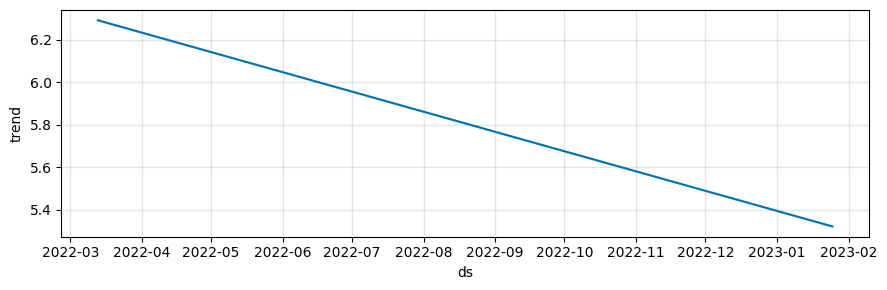

In [109]:
week=model1.plot_components(forecasting)
print(forecasting)